In [1]:
%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt
import math as m
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import pandas as pd


/Users/danielreeves/anaconda/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


# functions for probability distributions

In [2]:
#Calculating the multiplicity of multinomial combinations
#the number of words  found in the expansion (a+b+c+...R)^n that have exactly k letters. 
def exactly_k(n,R):
    g_k = np.zeros(R) #make an array to hold the probabilities of exactly k strains, where k\le R
    #k needs to run from 1->R, p_{k=0} = 0
    for k in range(1,R+1,1):
        inc_exc = 0.0 #include exclude factor
        #i runs from 0 to k-1
        for i in range(k):
            #print(inc_exc)
            inc_exc += m.factorial(k)/m.factorial(k-i)/m.factorial(i)*(-1)**i*(k-i)**n     
        g_k[k-1] = m.factorial(R)/m.factorial(k)/m.factorial(R-k)*inc_exc
    return g_k

#calculates the conditional probabilites of observed richness Robs 
#given number of samples n and true richness R
def conditional_p_Robs(Robs,n,R):
    cond_Robs = np.zeros(len(Robs))
    for r in range(len(Robs)):
        if Robs[r]<=R:
            cond_Robs[r] = exactly_k(n,R)[r]/R**n
        else:
            cond_Robs[r] = 0
    return cond_Robs

#calculates the conditional probabilites of true richness R
#given the conditional distribution on Robs and the chosen distribution on R
def conditional_p_R(cond_Robs,p_R):
    #calculate the conditional probability matrix that depends on
    cond_R=[]
    for p in range(len(p_R)):
        cond_R.append(cond_Robs*p_R[p])
    cond_R = np.array(cond_R) #make it an array
    return cond_R

#calculates probability of observing Robs 
#given the conditional probability on R
def p_Robs(cond_R):
    p_Robs = np.sum(cond_R,1) #sum over R
    return p_Robs


# distribution guesses?

In [3]:
#function to compute the ZTP distribution
def ztp(R,lam):
    p_R=[]
    for r in R:
        p_R.append(lam**r/(np.exp(lam)-1)/m.factorial(r))
    return np.array(p_R)

#the mean of the ztp distribution
def ztp_avg(lam):
    return lam/(1-np.exp(-lam))

# making some plots, exploring distributions

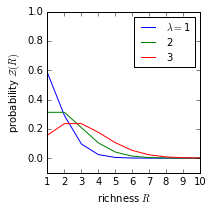

In [4]:
#exploring the distributions we want to use
R_max=10
R=np.arange(1,R_max+1,1); 

plt.figure(figsize=(3,3),dpi=600)

plt.ylabel(r'probability $\mathcal{Z}(R)$')
plt.xlabel(r'richness $R$')

for i in range(3):
    lam=i+1
    p_R = ztp(R,lam)
    plt.plot(R,p_R)
    
plt.legend([r'$\lambda=$1',r'2',r'3'],fontsize=10)
plt.ylim([-0.1,1])

plt.tight_layout()
plt.savefig('figures/ZTP.pdf')  # No warning now

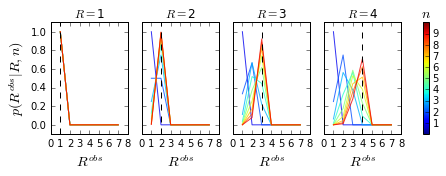

In [5]:
#fig 2, probability of measuring given R with different n
f2, axarr2 = plt.subplots(1,4, sharey=True,figsize=(7,2.5),dpi=600)

nmax=10
nlist=np.arange(1,nmax,1)
Romax=8

# setup the normalization and the colormap
normalize=mcolors.Normalize(0, nmax)
colormap=cm.jet

for R in np.arange(1,5,1):
    Ro=np.arange(1,Romax,1)
    cond_Ro = np.zeros(4)
    ax=axarr2[R-1]
    for n in nlist:
        cond_Ro=conditional_p_Robs(Ro,n,R)
        ax.plot(Ro,cond_Ro,alpha=0.8,lw=1,color=colormap(normalize(n)))

    ax.set_xlim([0,Romax])        
    ax.set_xlabel(r'$R^{obs}$',fontsize=14)
    axarr2[0].set_ylabel(r'$p(R^{obs}|R,n)$',fontsize=14)
    ax.set_title(r'$R=$'+str(R))
    ax.axvline(R, color='k', linestyle='--')

plt.tight_layout()

# setup the colorbar
scalarmappaple=cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nlist)
cbar=plt.colorbar(scalarmappaple,ax=axarr2.ravel().tolist())
cbar.set_ticks(nlist) # add the labels
cbar.set_ticklabels(nlist) # add the labels
cbar.ax.set_title('$n$',fontsize=14)

axarr2[0].set_ylim([-0.1,1.1])
#axarr2[0].legend([r'$n$=1','2','3','4','5','6','7','8','9','10'],fontsize=8)
plt.savefig('figures/p_Robs-Rn_varyn.pdf')  # No warning now

In [6]:
#evenness

#calculate the exponential probabilities
def p_vi(x,al,x_max):
    return np.exp(-al*x)/np.sum(np.exp(-al*Rs))



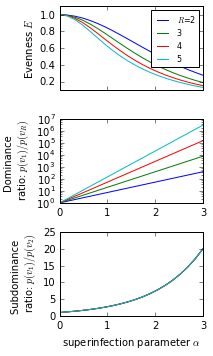

In [7]:
#explore the exponential distribution

plt.figure(figsize=(3,5),dpi=600)
for x_max in [2,3,4,5]:
    
    Rs=np.arange(1,x_max+1)
    
    S_list=[]; E_list=[]; prob_ratio=[]; prob_ratio_sub=[]
    
    al_list=np.linspace(0,3,20)

    #print('al','    S','    E')
    for alpha in al_list:
        
        S = -np.sum(p_vi(Rs,alpha,x_max)*np.log(p_vi(Rs,alpha,x_max))) 
        E = S/np.log(x_max)
        #print(round(alpha,2),' ',round(S,2),' ',round(E,2))
        
        S_list.append(S)
        E_list.append(E)
        prob_ratio.append(p_vi(0,alpha,x_max)/p_vi(x_max,alpha,x_max))
        prob_ratio_sub.append(p_vi(0,alpha,x_max)/p_vi(1,alpha,x_max))

    plt.subplot(311)
    plt.plot(al_list,E_list)
    #plt.xlabel('superinfection \n parameter ' + r'$\alpha$')
    plt.ylabel(r'Evenness $E$')
    plt.legend([r'$R$=2','3','4','5'],fontsize=8)
    plt.xticks([0,1,2,3],[])    
    
    plt.subplot(312)
    plt.semilogy(al_list,prob_ratio)
    plt.ylabel('Dominance \n ratio: ' + r'$p(v_1)/p(v_R)$')
    plt.xticks([0,1,2,3])

    plt.subplot(313)
    plt.plot(al_list,prob_ratio_sub)
    plt.xlabel('superinfection parameter ' + r'$\alpha$')
    plt.ylabel('Subdominance \n ratio: ' + r'$p(v_1)/p(v_2)$',fontsize=10)
    plt.xticks([0,1,2,3])

plt.tight_layout()
plt.savefig('figures/alpha_explore.pdf')  # No warning now

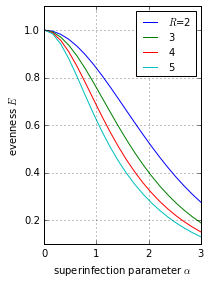

In [8]:
#just plot evenness

plt.figure(figsize=(3,4),dpi=600)
for x_max in [2,3,4,5]:
    
    Rs=np.arange(1,x_max+1)
    
    S_list=[]; E_list=[]; prob_ratio=[]; prob_ratio_sub=[]
    
    al_list=np.linspace(0,3,20)

    #print('al','    S','    E')
    for alpha in al_list:
        
        S = -np.sum(p_vi(Rs,alpha,x_max)*np.log(p_vi(Rs,alpha,x_max))) 
        E = S/np.log(x_max)
        #print(round(alpha,2),' ',round(S,2),' ',round(E,2))
        
        S_list.append(S)
        E_list.append(E)
        prob_ratio.append(p_vi(0,alpha,x_max)/p_vi(x_max,alpha,x_max))
        prob_ratio_sub.append(p_vi(0,alpha,x_max)/p_vi(1,alpha,x_max))

    plt.plot(al_list,E_list)
    plt.xlabel('superinfection parameter ' + r'$\alpha$')
    plt.ylabel(r'evenness $E$')
    plt.legend([r'$R$=2','3','4','5'],fontsize=10)
    plt.xticks([0,1,2,3])    

plt.grid()
plt.tight_layout()
plt.gcf().savefig('figures/E_vs_alpha.pdf')  # No warning now

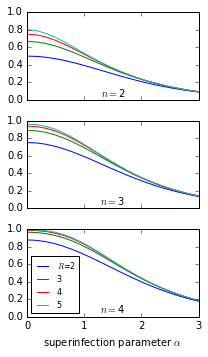

In [9]:
#superinfection probabilities p_S vs alpha with different n for panels

plt.figure(figsize=(3,5),dpi=600)
for n in [2,3,4]:
    for x_max in [2,3,4,5]:

        Rs=np.arange(1,x_max+1)

        al_list=np.linspace(0,3,20)

        p_sup=[]

        for alpha in al_list:
            p_single=0
            for x in Rs:
                p_single += p_vi(x,alpha,x_max)**n

            p_sup.append(1-p_single)

        plt.subplot(3,1,n-1)
        plt.plot(al_list,p_sup)
        plt.ylim([0,1])
        plt.yticks(np.linspace(0,1,6))
        if n==4:
            plt.xlabel('superinfection parameter ' + r'$\alpha$')
            plt.xticks([0,1,2,3])
        else:
            plt.xticks([0,1,2,3],[])
    plt.text(1.5, 0.04, r'$n=$'+str(n), ha='center')


plt.legend([r'$R$=2','3','4','5'],fontsize=8,loc=3)

#plt.text(-0.75, 1.75, 'probability of observing superinfection', va='center', rotation='vertical')

plt.tight_layout()

plt.gcf().savefig('figures/super_explore.pdf')  # No warning now

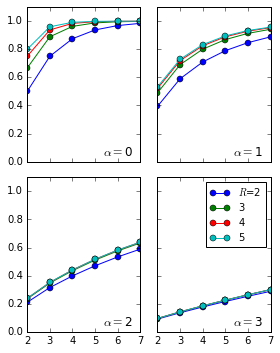

In [10]:
#superinfection probabilities p_S vs n with different alpha for panels

fig,axarr=plt.subplots(2,2,sharex=True,sharey=True, figsize=(4,5),dpi=600)
n_list=range(2,8)
for alpha in [0,1,2,3]:
    for x_max in [2,3,4,5]:
        p_sup=[]
        for n in n_list:

            Rs=np.arange(1,x_max+1)
            p_single=0
            for x in Rs:
                p_single += p_vi(x,alpha,x_max)**n

            p_sup.append(1-p_single)

        ax=axarr[int(alpha/2.)][alpha%2]
        ax.plot(n_list,p_sup,'-o')
        ax.set_xticks(n_list)
    ax.text(6, 0.04, r'$\alpha=$'+str(alpha), ha='center',fontsize=12)
ax.set_ylim(0,1.1)
ax.set_yticks(np.linspace(0,1,6))
plt.legend([r'$R$=2','3','4','5'],fontsize=10,loc=1)

plt.tight_layout()

plt.gcf().savefig('figures/p_S_explore.pdf')  # No warning now